<a href="https://colab.research.google.com/github/TimoWijnen2001/JBG060_G13/blob/main/Visualize_point_labels_SEAVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualise pointlabels for the SEAVIEW dataset

Below you find how to plot the pointlabels of the SEAVIEW dataset over the images to get a better understanding of how these images are labeled.
In practise marine biologists will spend hours annotating these randomly generated point labels by hand. They have to fill in the species and functional group of each point.

In [ ]:
import pandas as pd
from google.colab import drive
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change ROOT_DIR to the location where you have short cutted the dataset to
ROOT_DIR = "/content/drive/MyDrive/Data Challenge 3 - JBG060 AY2526/01_data/benthic_datasets/point_labels/SEAVIEW"
IMAGES_DIR = f"{ROOT_DIR}/ATL"
POINTS_DIR = f"{ROOT_DIR}/tabular-data/annotations_ATL.csv"

In [ ]:
points_df = pd.read_csv(POINTS_DIR)
points_df

,quadratid,y,x,label_name,label,func_group,method,data_set
0,17001738002,180,183,Fish,FISH,Other,random,test
1,17001738002,199,162,CCA,CCA,Algae,random,test
2,17001738002,197,160,CCA,CCA,Algae,random,test
3,17001738002,88,561,Turf,Turf,Algae,random,test
4,17001738002,195,714,Ocomplex,OCOM,Hard Coral,random,test
...,...,...,...,...,...,...,...,...
92895,21011130002,619,738,Pseudodiploria bleached,PSEU-BL,Hard Coral,target,train
92896,21011130002,535,751,Pseudodiploria bleached,PSEU-BL,Hard Coral,target,train
92897,21011130002,458,555,Pseudodiploria bleached,PSEU-BL,Hard Coral,target,train
92898,21011130002,409,539,Pseudodiploria bleached,PSEU-BL,Hard Coral,target,train


In [ ]:
def load_points_data(points_file_path):
    points_df = pd.read_csv(points_file_path)
    points_df['quadratid'] = points_df['quadratid'].astype(str)
    return points_df

def find_images_with_points(images_directory, points_df):
    image_quadrat_ids = [os.path.splitext(f)[0] for f in os.listdir(images_directory) if f.endswith('.jpg')]
    points_quadrat_ids = points_df['quadratid'].unique().tolist()
    quadrat_ids_with_points = list(set(image_quadrat_ids) & set(points_quadrat_ids))
    return quadrat_ids_with_points

def filter_points_for_image(quadrat_id, points_df):
    image_points_df = points_df[points_df['quadratid'] == quadrat_id].copy()
    return image_points_df

def create_color_map(image_points_df):
    unique_func_groups = image_points_df['func_group'].unique()
    colors = plt.cm.get_cmap('viridis', len(unique_func_groups))
    color_map = {group: colors(i) for i, group in enumerate(unique_func_groups)}
    return color_map

def visualize_image_with_points(image_path, image_points_df, color_map):
    try:
        img = Image.open(image_path)
        fig, ax = plt.figure(figsize=(10, 10)), plt.gca()
        ax.imshow(img)

        for func_group in image_points_df['func_group'].unique():
            group_points = image_points_df[image_points_df['func_group'] == func_group]
            ax.scatter(group_points['x'], group_points['y'], color=color_map[func_group], label=func_group, s=10)

        ax.set_title(f'Point Labels for Quadrat ID: {os.path.splitext(os.path.basename(image_path))[0]}')
        ax.invert_yaxis()
        ax.legend()
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while visualizing the image: {e}")


/tmp/ipython-input-3976200795.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_func_groups))


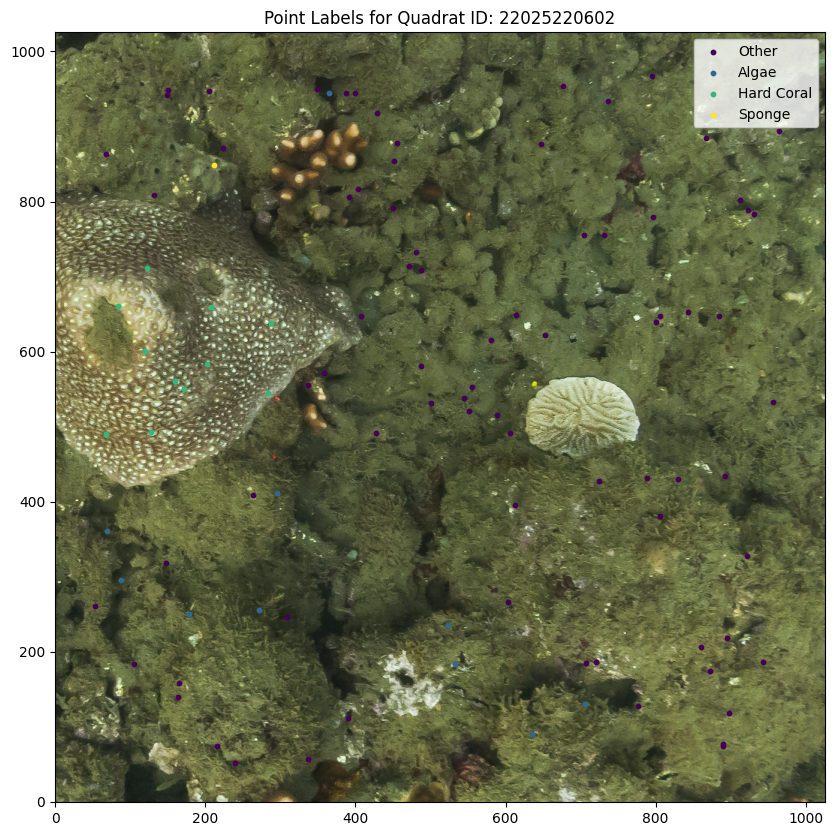

In [ ]:
# Load data
all_points_df = load_points_data(POINTS_DIR)

# Find images with points
quadrat_ids_with_associated_points = find_images_with_points(IMAGES_DIR, all_points_df)

# Select an image with points (using the first one from the list)
selected_quadrat_id_for_visualization = quadrat_ids_with_associated_points[9]

# Construct the full path to the selected image file
selected_image_filepath = os.path.join(IMAGES_DIR, f"{selected_quadrat_id_for_visualization}.jpg")

# Filter point labels for the selected image
points_for_selected_image_df = filter_points_for_image(selected_quadrat_id_for_visualization, all_points_df)

# Create a color mapping
functional_group_color_map = create_color_map(points_for_selected_image_df)

# Visualize image with colored points
visualize_image_with_points(selected_image_filepath, points_for_selected_image_df, functional_group_color_map)